In [5]:
from collections import namedtuple

import gizeh
import numpy as np

In [6]:
Vector = namedtuple('Vector', ['x', 'y'])

In [291]:
class Cell:
    MAX_CONCENTRATION = 1024
    
    def __init__(self, x, y, radius, is_stem=False, stem_angle=None):
        self.x = x
        self.y = y
        self.radius = radius
        self.is_stem = is_stem
        self.neighbours = {}
        self.checked = False
        
        if self.is_stem:
            self.stem_angle = stem_angle
            
        if self.is_stem:
            self.concentration = Cell.MAX_CONCENTRATION
        else:
            self.concentration = Cell.MAX_CONCENTRATION/2
            
    def __repr__(self):
        return '(x: {x}, y: {y}){stem}'.format(x = self.x,
                                               y = self.y,
                                               stem = '*' if self.is_stem else '')
            
    def set_gradient(self):
        if self.is_stem:
            angle = (self.stem_angle + np.pi) % (2*np.pi)
            self.gradient = Vector(x = self.radius * np.cos(angle),
                                   y = self.radius * np.sin(angle))
            
        else:
            self.gradient = Vector(x = self.radius,
                                   y = 0)
        
    def add_neighbour(self, angle, neighbour):
        self.neighbours[neighbour] = angle
        neighbour.neighbours[self] = (np.pi + angle) % (2*np.pi)
        
    def divide(self):
        """Return a new neighbour of the cell"""
        return Cell(None, None, self.radius) # x and y don't matter now

In [305]:
class Organism:
    def __init__(self):
        self.cells = [Cell(x=0, y=0, radius=30, is_stem=True, stem_angle=-np.pi/2)]
        
        
        
    def set_gradients(self):
        """Set all the gradients in `self.cells`"""
        for cell in self.cells:
            cell.set_gradient()
    
    def draw(self):
        """Draw the organism"""
        surface = gizeh.Surface(width=500, height=500)
        
        offset = 250
        
        for cell in self.cells:
            circle = gizeh.circle(r=cell.radius,
                                  xy=[cell.x + offset, cell.y + offset],
                                  fill=(cell.concentration/Cell.MAX_CONCENTRATION, 0, 0),
                                  stroke=(0,0,0),
                                  stroke_width=2)
            circle.draw(surface)
            
            # draw the gradient of the cell as an arrow
            triangle = gizeh.regular_polygon(r=cell.radius/5, n=3, angle=0,
                                             xy=[cell.x+offset+.7*cell.radius,cell.y+offset], fill=(0,0,0))
            
            line = gizeh.polyline(points=[(cell.x+offset,cell.y+offset), (cell.x+offset+.7*cell.radius,cell.y+offset)],
                                  stroke_width=3, stroke=(0,0,0))

            gradient_angle = np.arctan(cell.gradient.y / cell.gradient.x)
            
            arrow = gizeh.Group([triangle, line])
            arrow = arrow.rotate(gradient_angle, center=[cell.x+offset,cell.y+offset])
            arrow.draw(surface)
            
            if cell.is_stem:
                stem_r = cell.radius / 5
                
                circle = gizeh.circle(r=stem_r,
                                      xy=[
                                          cell.x + offset + (cell.radius - stem_r)*np.cos(cell.stem_angle),
                                          cell.y + offset + (cell.radius - stem_r)*np.sin(cell.stem_angle),
                                      ],
                                      fill=(0,0,1))
                circle.draw(surface)
                
            
        return surface
    
    def divide_cells(self):
        
        new_cells = []
        
        for cell in self.cells:            
            new_cell = cell.divide()
            cell.add_neighbour(np.random.random()*2*np.pi, new_cell)
            new_cells.append(new_cell)
            
        for new_cell in new_cells:
            self.cells.append(new_cell)
            
        for cell in self.cells:
            cell.checked = False
        
        self.check_correctness(self.cells[0])
        
    def check_correctness(self, cell):
        cell.checked = True
        for neighbour, angle in cell.neighbours.items():
            if not neighbour.checked:
                neighbour.x = cell.x + 2*cell.radius*np.cos(angle)
                neighbour.y = cell.y + 2*cell.radius*np.sin(angle)
                self.check_correctness(neighbour)
                
        self.set_gradients()

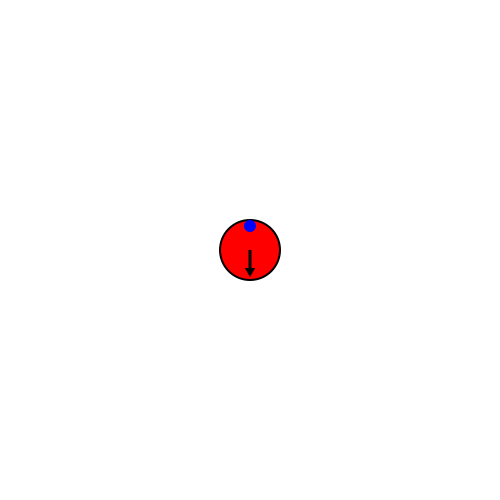

In [325]:
wormy = Organism()
wormy.set_gradients()
wormy.draw()

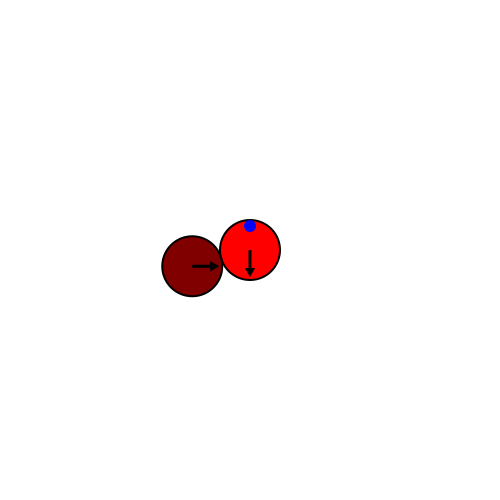

In [326]:
wormy.divide_cells()
wormy.draw()

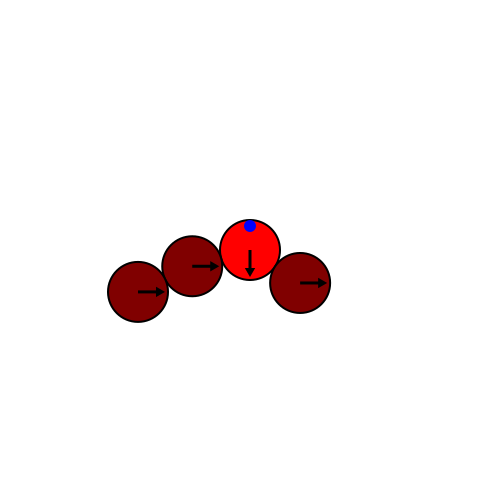

In [327]:
wormy.divide_cells()
wormy.draw()

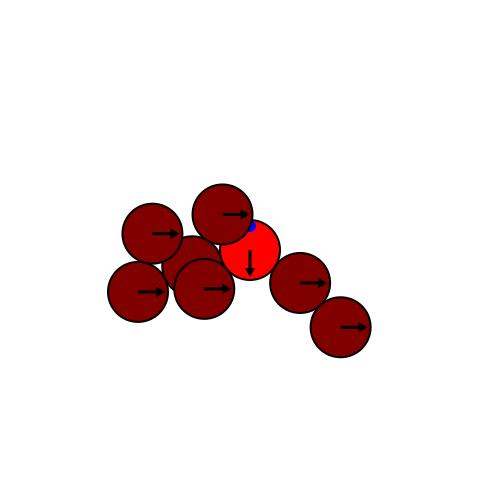

In [328]:
wormy.divide_cells()
wormy.draw()

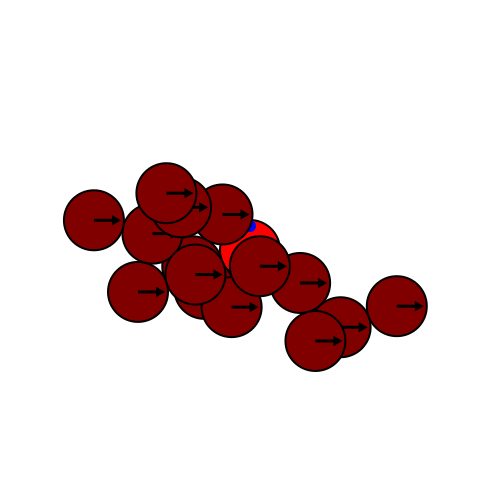

In [329]:
wormy.divide_cells()
wormy.draw()

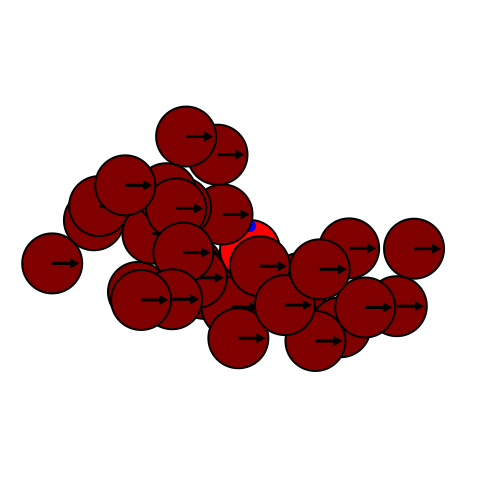

In [330]:
wormy.divide_cells()
wormy.draw()